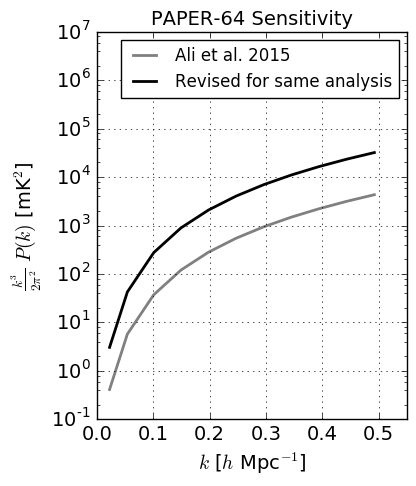

Sensitivity levels go up by a factor of: 7.41645596796


In [3]:
import pylab as p
import numpy as n
from capo import sensitivity

k = n.array([0.02247674,0.05406623,0.10088121,0.1492206,0.19797087,0.24688874,0.2958911,0.34494194,0.39402316,0.4431246,0.49224038])

# Re-produce ali_et_al2015
S_64 = sensitivity.Sense()
z = 8.37
S_64.z = z
S_64.Npols = 2
S_64.Tsys = 500e3 # evernote
S_64.t_int = 3520 # evernote
S_64.Nlsthours = 8.5 # evernote
S_64.Ndays = 120 # evernote
S_64.Nbls = 50 # evernote
S_64.Nseps = 3 # XXX if this is 3, then it reproduces ali_et_al2015 
S_64.Nblgroups = 1 
S_64.Omega_eff = 1.7 # evernote
S_64.calc()
S_64.P_N /= n.sqrt(2) # set Nreal = 2 instead of sqrt(2)
sense64 = S_64.Delta2_N(k)

# New sensitivity curve
S_64_new = sensitivity.Sense()
z = 8.37
S_64_new.Npols = 2
S_64_new.z = z
S_64_new.Tsys = 422309.456191 # for T_rcvr = 144K
S_64_new.t_int = 3857.31103517
S_64_new.Nlsthours = 8 
S_64_new.Ndays = 34.1105071676
S_64_new.Nbls = 51 
S_64_new.Nseps = 3 
S_64_new.Nblgroups = 5 
S_64_new.Omega_eff = 0.74**2/0.24
S_64_new.calc()
sense64_new = S_64_new.Delta2_N(k)

# Plot
p.figure(figsize=(4,5))
p.plot(k,sense64*2,'0.5',label='Ali et al. 2015', linewidth=2) # 2-sigma
p.plot(k,sense64_new*2,'k-',label='Revised for same analysis', linewidth=2)
p.yscale('log')
p.ylim(1e-1,1e7)
p.xlim(0,0.55)
p.grid()
p.xlabel('$k$ [$h$ Mpc$^{-1}$]', fontsize=14)
p.ylabel('$\\frac{k^{3}}{2\pi^{2}}$ $P(k)$ [mK$^{2}$]', fontsize=14)
p.title('PAPER-64 Sensitivity', fontsize=14)
p.legend(loc='best',prop={'size':12})
p.tick_params(axis='both', which='major', labelsize=14)
p.savefig('/home/cacheng/capo/ctc/methods_paper_images/sense_check.pdf',bbox_inches='tight')
p.show()

print "Sensitivity levels go up by a factor of:",S_64_new.P_N/S_64.P_N

The above plot is the predicted sensitivity of noise for ONE baseline type for PAPER-64. 

In [85]:
# Danny's numbers are OFF from his notebook (the calculation function must have changed since then!)

#recreate Ali et al
S_64 = sensitivity.Sense()
z = 8.36
f = 1420.5/(1+z)
S_64.z = z
S_64.Npols = 1 #2 # XXX added this in
S_64.Tsys = 500e3 #evernote
S_64.t_int = 3520 #from Evernote
S_64.Nlsthours = 8.5 #evernote
S_64.Ndays = 120 #evernote
S_64.Nbls = 50 #evernote
S_64.Nseps = 3 
S_64.Nblgroups = 1 
S_64.Omega_eff = 1.7 #evernote
S_64.calc()
S_64.P_N /= n.sqrt(2) #set Nreal = 2 instead of sqrt(2)
print S_64.bl_eff
print "ALI \Delta^2 (k=0.3) = ",S_64.Delta2_N(0.3)*2

#revised psa64
S_64_new = sensitivity.Sense()
z = 8.36
f = 1420.5/(1+z)
S_64_new.z = z
S_64_new.Npols = 1 #2 XXX added this in 
S_64_new.Tsys = (200 + 180.*(f/180)**-2.55)*1e3 #set to match noise model
S_64_new.t_int = 3414 # python ~/scripts/frf_diagnose.py -C psa6240_v003 --seps=0,1 -pxx; returns T_eff = 3414s (NEBW)
S_64_new.Nlsthours = S_64.Nlsthours
S_64_new.Ndays = 32 #Matt's calculation of effective number of days per lst bin, avg(1/sqrt(N_days[lst]))
S_64_new.Nbls = 48 #found a couple more ugly bls
S_64_new.Nseps = S_64.Nseps
S_64_new.Nblgroups = 5  #Ali et al pg 12
S_64_new.Omega_eff = 0.74**2/0.24 #as discussed on slack, Omega_prime=Omega_p_flat^2/Omega_pp_frf as listed in beamsculpting paper, table 1
S_64_new.calc()
print S_64_new.Omega_eff
print S_64_new.Tsys
print S_64_new.P_N
print S_64_new.bl_eff
print "Jacobs \Delta^2 (k=0.3) = ",S_64_new.Delta2_N(0.3)*2
print "revised/published =", S_64_new.Delta2_N(0.3)/S_64.Delta2_N(0.3)

50
ALI \Delta^2 (k=0.3) =  1955.78448476
2.28166666667
478128.600404
8300858.77137
40.249223595
Jacobs \Delta^2 (k=0.3) =  16057.2824184
revised/published = 8.2101491977


# Plot FRP

/home/cacheng/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


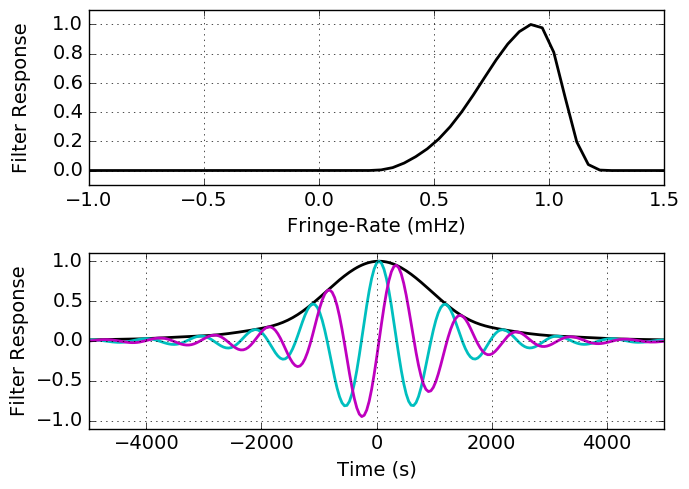

In [2]:
import numpy as n
import aipy 
import capo
from capo import fringe

# Get filter
freqs = n.linspace(.1,.2,203,endpoint=False)
aa = aipy.cal.get_aa('psa6240_v003', freqs)
inttime = 42.9 # XXX inttime hard-coded
bins = fringe.gen_frbins(inttime) 
myfreq=101
frp, bins = fringe.aa_to_fr_profile(aa, (1,4), myfreq , bins=bins)
timebins, firs = fringe.frp_to_firs(frp, bins, aa.get_freqs(), fq0 = aa.get_freqs()[myfreq])
max=firs[myfreq].max(); filter=firs[myfreq]   # get FRP
frp2=capo.fringe.fir_to_frp(filter) # get FRP after xtalk is removed
peak=n.where(n.abs(filter) == n.abs(filter).max())[0][0]     # find peak of FIR
firsthalf=n.linspace(0,inttime*peak,peak,endpoint=False)[::-1]*-1     # construct negative times for x-axis
secondhalf=n.linspace(0,inttime*(filter.shape[0]-peak+1),filter.shape[0]-peak+1,endpoint=False)[1:]     # construct positive times for x-axis
times=[]; times.append(firsthalf); times.append(secondhalf); times=n.array(times).flatten()     # combine 

# Plot
p.figure(figsize=(7,5))
p.subplot(211)
p.plot(bins*10**3,frp2/n.max(frp2),'k-', linewidth=2)
p.grid()
p.xlim(-1,1.5)
p.ylim(-0.1,1.1)
p.xlabel('Fringe-Rate (mHz)', fontsize=14)
p.ylabel('Filter Response', fontsize=14, labelpad=15)
p.tick_params(axis='both', which='major', labelsize=14)
p.subplot(212)
p.plot(times,n.abs(filter)/max,'k-', linewidth=2)
p.plot(times,n.real(filter)/max,'c-', linewidth=2)
p.plot(times,n.imag(filter)/max,'m-', linewidth=2)
p.grid()
p.xlabel('Time (s)', fontsize=14)
p.ylabel('Filter Response', fontsize=14)
p.tick_params(axis='both', which='major', labelsize=14)
p.ylim(-1.1,1.1)
p.xlim(-5000,5000)
p.tight_layout()
p.savefig('/home/cacheng/capo/ctc/methods_paper_images/frp.pdf',bbox_inches='tight')
p.show()   